In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [9]:
fashion_mnist_df = pd.read_csv('./data/fashion-mnist_train.csv')
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_mnist_df.shape

(60000, 785)

In [11]:
fashion_mnist_df = fashion_mnist_df.sample(frac=.4).reset_index(drop=True)

In [12]:
LOOKUP = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [14]:
def display_image(features, actual_label):
    print('Actual label: {}'.format(LOOKUP[actual_label]))
    plt.imshow(features.reshape(28, 28), cmap='gray')

In [15]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,4,0,0,...,134,95,41,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = fashion_mnist_df[fashion_mnist_df.columns[0]]
y.head()

0    3
1    9
2    9
3    9
4    9
Name: label, dtype: int64

Actual label: Shirt


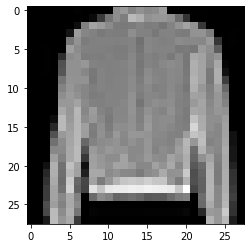

In [22]:
display_image(X.iloc[54].values, y.iloc[54])

In [23]:
X = X / 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015686,0.0,0.0,...,0.52549,0.372549,0.160784,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
def summerize_classification(y_test, y_pred, avg_method='weighted'):
    print('Accuracy: {}'.format(accuracy_score(y_test, y_pred, normalize=True)))
    print('Accuracy num: {}'.format(
        accuracy_score(y_test, y_pred, normalize=False)))
    print('Precision: {}'.format(precision_score(
        y_test, y_pred, average=avg_method)))
    print('Recall: {}'.format(recall_score(y_test, y_pred, average=avg_method)))


In [26]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [27]:
y_pred = logistic_model.predict(x_test)

In [28]:
summerize_classification(y_test, y_pred)

Accuracy: 0.8375
Accuracy num: 4020
Precision: 0.8365745152484031
Recall: 0.8375
